# BSU session 6.2 - other models

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# fetching our data
df = sns.load_dataset('iris')
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


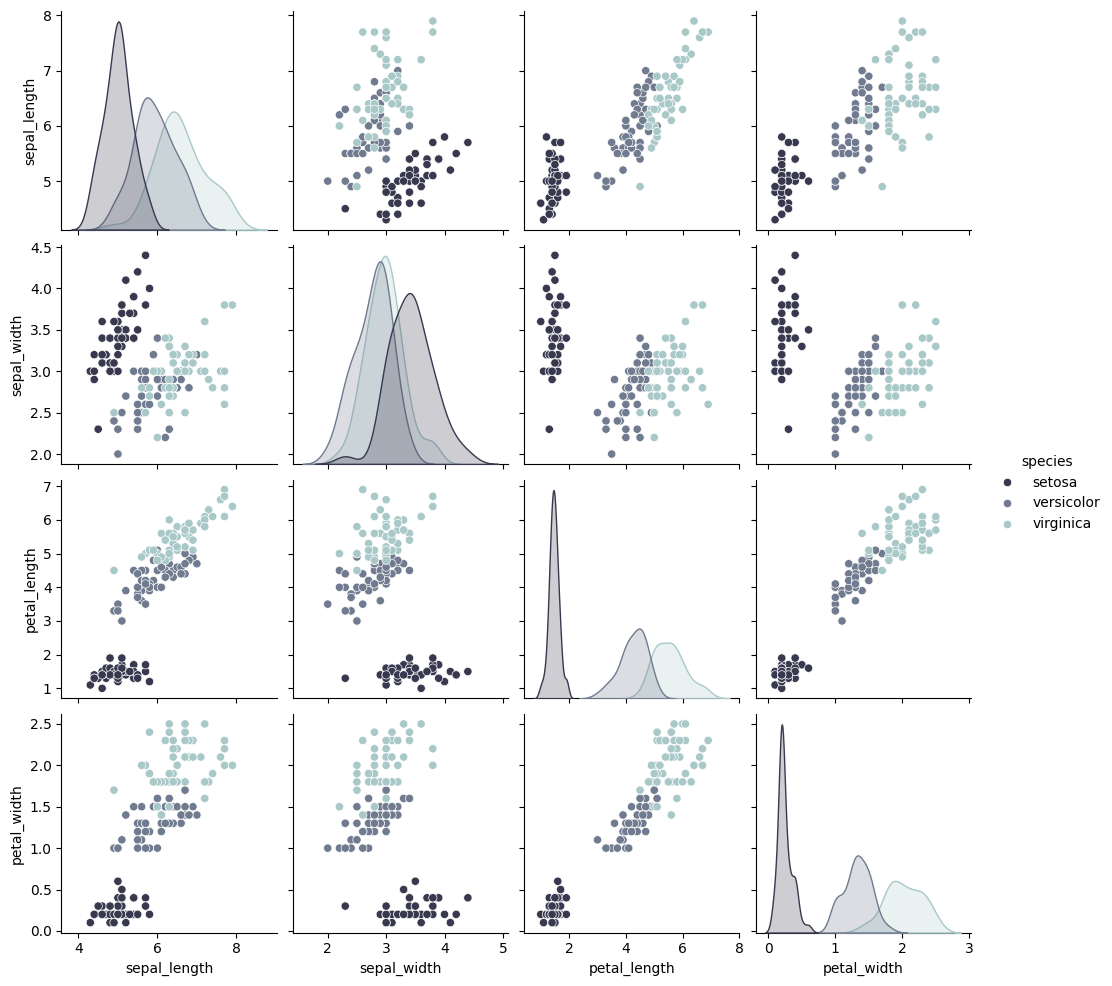

In [4]:
# exploring our data
sns.pairplot(df, hue='species', palette='bone')

In [5]:
# importing some machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [6]:
# shaping the data for modelling

# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating an instance of the classifier
clf = DecisionTreeClassifier()

#fitting the classifier to our training data
model = clf.fit(X_train, y_train)

In [7]:
# fetching labels and column names for better human-readability
target_names = []
for species in df['species'].unique():
    target_names.append(species)
feature_names = []
for colname in df.columns[:-1]:
    feature_names.append(colname)
print('Flowers:', target_names, '\nFeatures:', feature_names)

Flowers: ['setosa', 'versicolor', 'virginica'] 
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


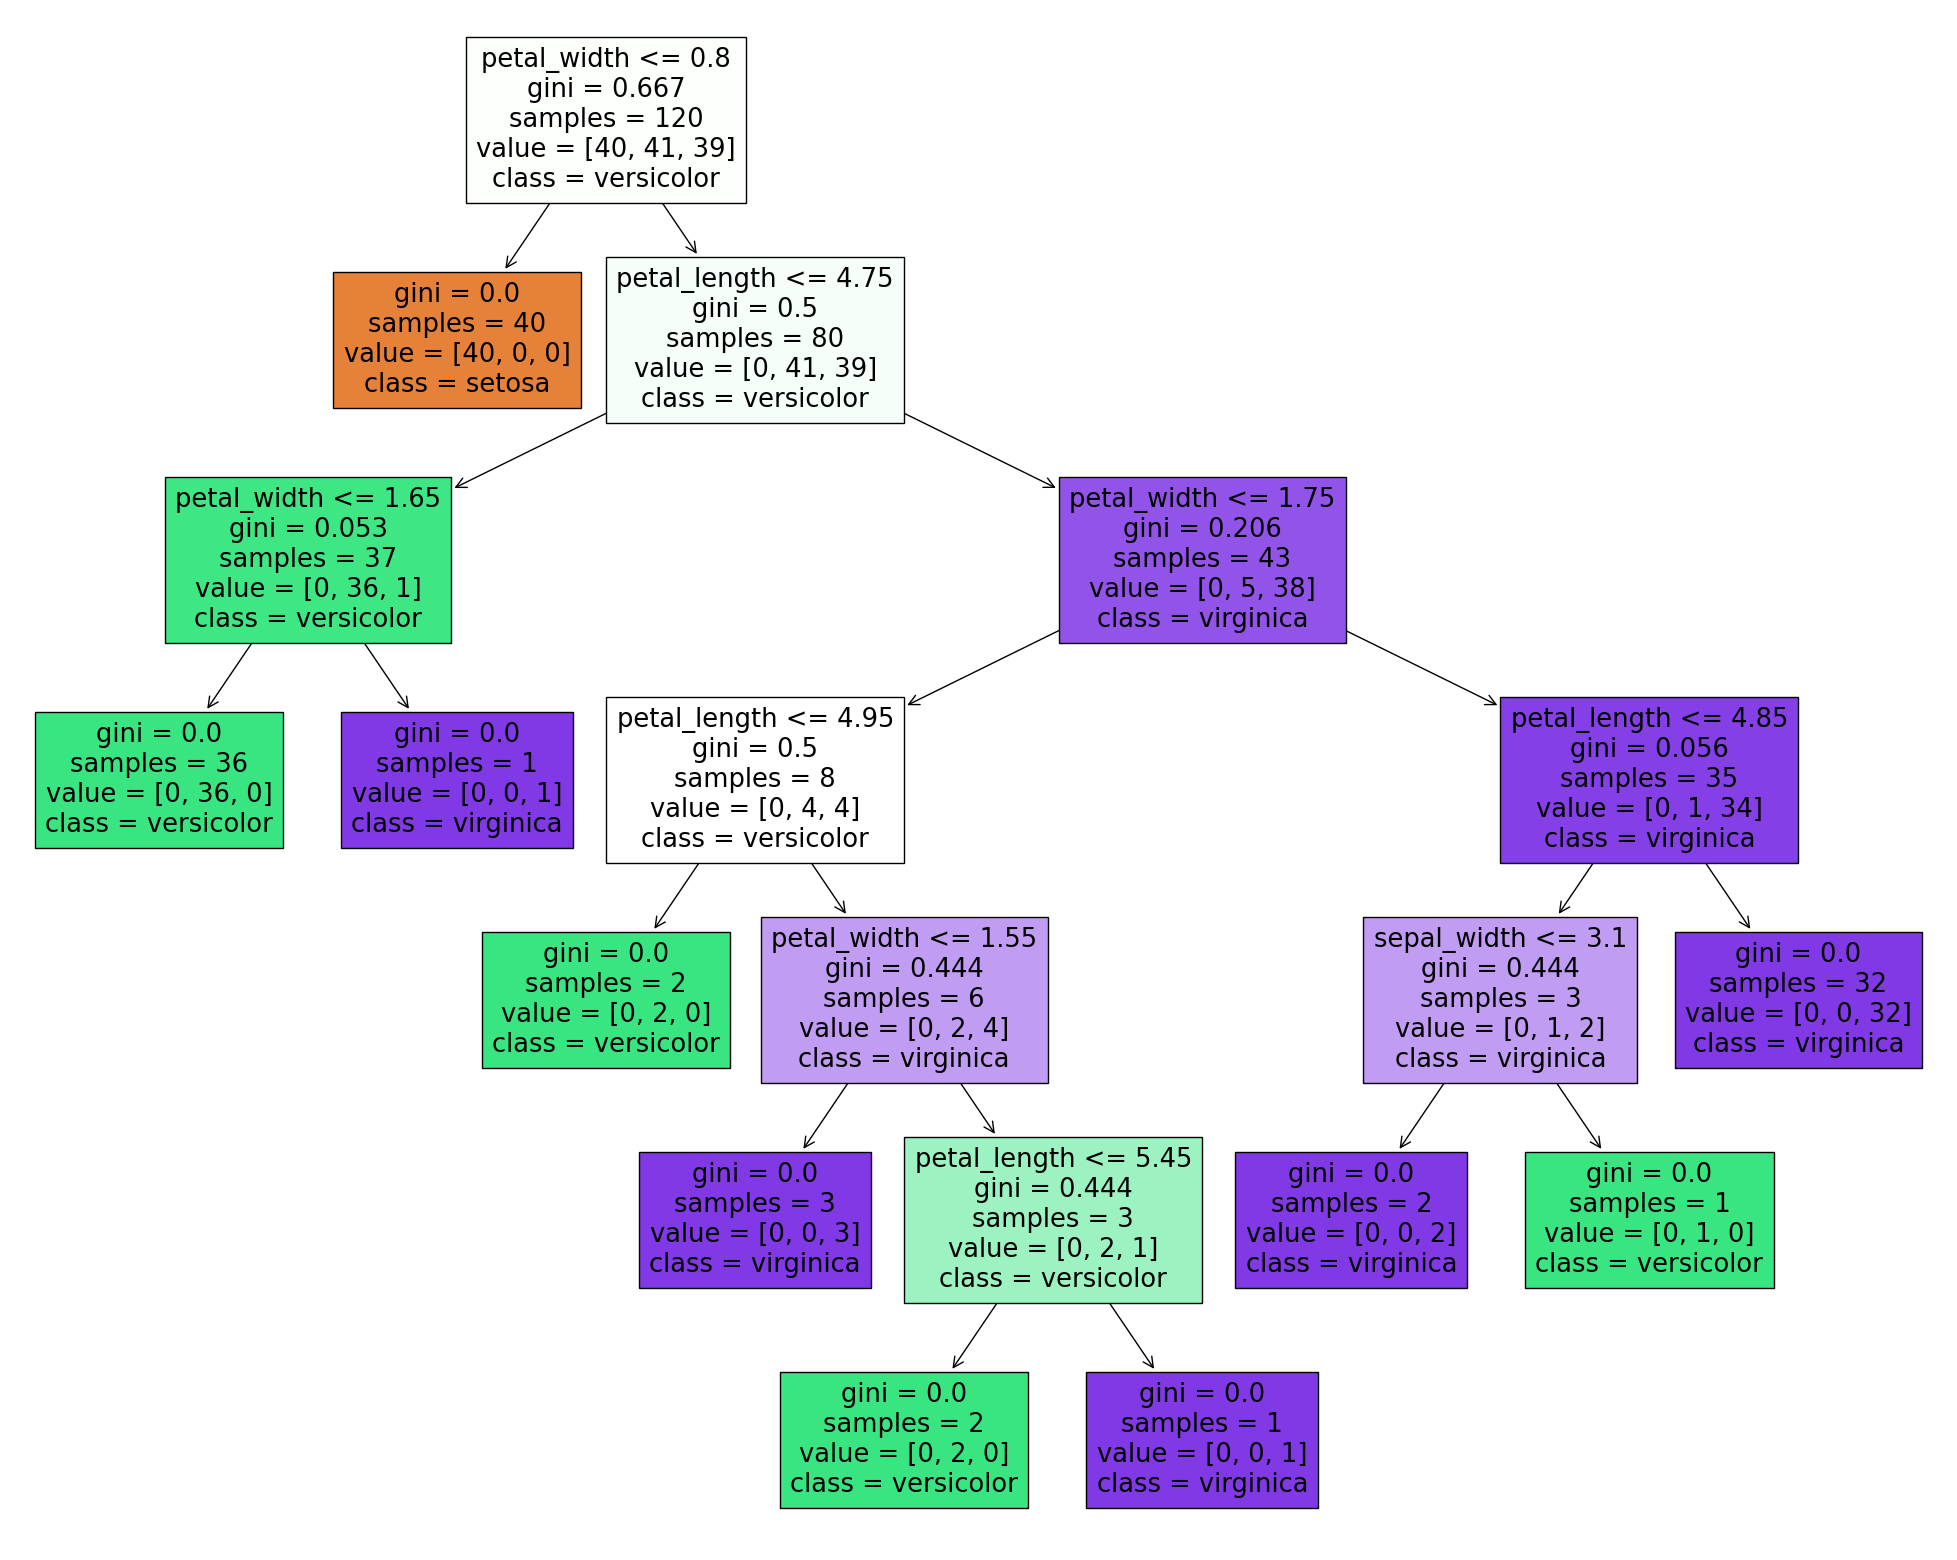

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [9]:
def mymetrics(model):
    from sklearn.metrics import confusion_matrix, roc_curve, auc
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    tree_predicted = model.predict(X_test)
    confusion = confusion_matrix(y_test, tree_predicted)
    y_score = model.fit(X_train, y_train).predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
    print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted, average='micro')))
    print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted, average='micro')))
    print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted, average='micro')))
    print('Confusion matrix \n', confusion)

mymetrics(clf)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
Confusion matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [10]:
y_train.shape

(120,)

## K Nearest Neighbours (KNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train.values, y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train.values, y_train.values)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test.values, y_test.values)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 1.00


In [12]:
flower = [[8,8,2,2]]
print('Predicted species for stats of', flower, 'is ', knn.predict(flower)[0])

Predicted species for stats of [[8, 8, 2, 2]] is  setosa


In [13]:
mymetrics(knn)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
Confusion matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


C:\Users\kings\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


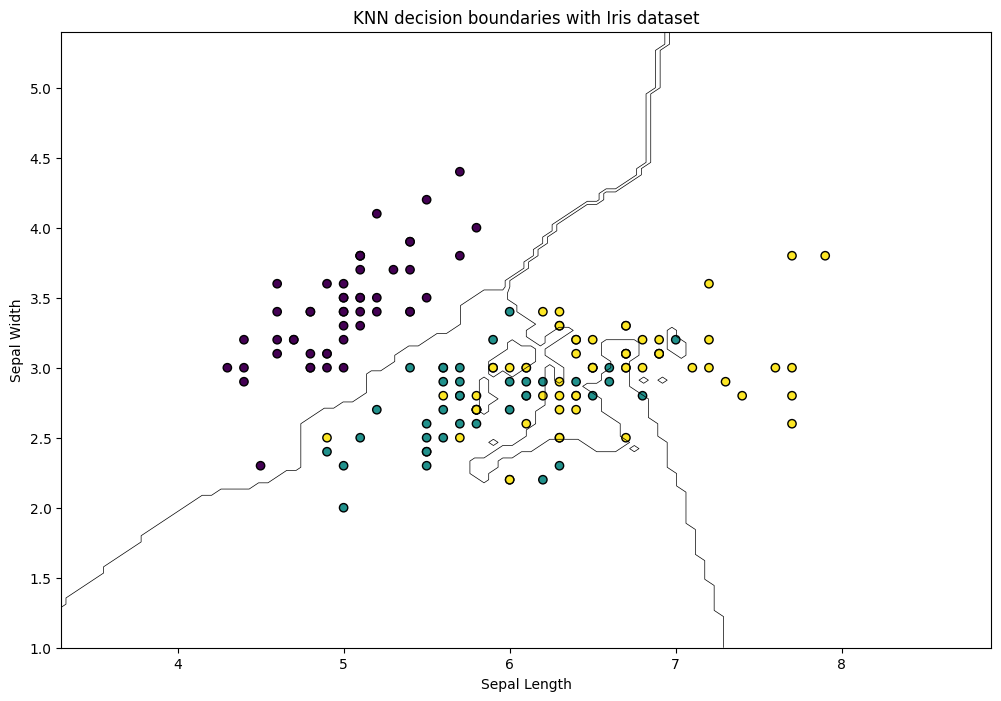

In [14]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Fit a KNN model to your data
knn = KNeighborsClassifier(n_neighbors=3)  # Or any other number of neighbors you want
knn.fit(data[:, 0:2], target)

# Create a grid of points
x = np.linspace(data[:, 0].min()-1, data[:, 0].max()+1, 100)
y = np.linspace(data[:, 1].min()-1, data[:, 1].max()+1, 100)
xx, yy = np.meshgrid(x, y)

# Use the KNN model to make predictions for each point on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the scatterplot
plt.figure(figsize=(12, 8))
plt.contour(xx, yy, Z, colors='k', linewidths=0.5, 
            levels=np.arange(target.min(), target.max() + 2) - 0.5)  # Draw decision boundaries as single lines
plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN decision boundaries with Iris dataset')

# Display the plot
plt.show()

## Fetching some gaming data

In [15]:
# import the data
df2 = pd.read_csv(r'D:\Programs\Data Programs\GitRep\KJK-Study-Book\BSU\Datasets\pvp_test7.csv')
df2.columns = ['player','date', 'instanceId', 'mode_num', 'duration', 'kda', 'kd', 'standing',
              'avscpl', 'assists', 'score', 'kills', 'avscpk', 'deaths', 'completed',
              'opponentsDefeated', 'efficiency', 'team', 'completionReason', 'fireteamId',
              'startSeconds' , 'timePlayedSeconds', 'playerCount', 'teamScore', 'elo', 
               'ats_kills-pga', 'ats_prec_pga', 'ratio', 'best_weapon']
def label_modes (row): 
    if row['player']==" 'Forever_Chonky'" or row['player'] ==" 'Gillme'" or row['player'] == " 'StankBangus'":
        return 2
    elif row['player'] == " 'Baken'":
        return 3
    elif row['player'] == " 'Aztecross'" or row['player'] == " 'truevanguard'":
        return 0
    else:
        return 1
df2['group']= df2.apply (lambda row: label_modes(row), axis=1)

In [16]:
df2.head()

,player,date,instanceId,mode_num,duration,kda,kd,standing,avscpl,assists,...,startSeconds,timePlayedSeconds,playerCount,teamScore,elo,ats_kills-pga,ats_prec_pga,ratio,best_weapon,group
0,'Overloaded',2021-12-07T20:34:58Z,9697213242,80,513.0,2.000000,1.750000,0.0,0.000,2.0,...,2.0,511.0,6.0,5.0,95.441879,8.904996,3.051597,0.83609,Hand Cannon,1
1,'Overloaded',2021-11-21T18:10:12Z,9633347757,62,382.0,1.388889,1.333333,1.0,1.200,1.0,...,3.0,379.0,12.0,48.0,95.441879,8.904996,3.051597,0.83609,Hand Cannon,1
2,'Overloaded',2021-11-02T19:03:10Z,9553083931,81,415.0,0.900000,0.866667,1.0,2.375,1.0,...,3.0,412.0,12.0,163.0,95.441879,8.904996,3.051597,0.83609,Hand Cannon,1
3,'Overloaded',2021-10-31T15:52:10Z,9542398239,84,312.0,0.600000,0.600000,1.0,0.000,0.0,...,5.0,307.0,6.0,0.0,95.441879,8.904996,3.051597,0.83609,Hand Cannon,1
4,'Overloaded',2021-10-12T20:18:05Z,9428382498,62,353.0,1.318182,1.272727,0.0,1.250,1.0,...,13.0,340.0,13.0,60.0,95.441879,8.904996,3.051597,0.83609,Hand Cannon,1


<Axes: >

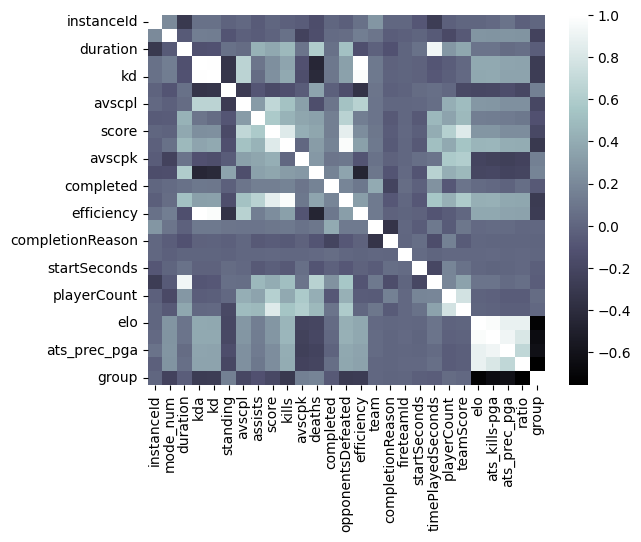

In [17]:
mycorr = df2.corr(numeric_only=True)
sns.heatmap(mycorr, cmap='bone')

<Axes: >

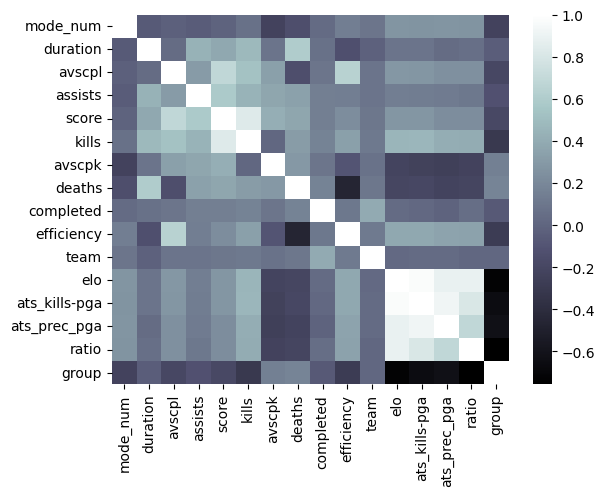

In [40]:
cols =['standing'] # columns we don't need
#df2.drop(cols, axis=1, inplace=True)
mycorr = df2.corr(numeric_only=True)
sns.heatmap(mycorr, cmap='bone')

#sns.pairplot(df2)

In [19]:
# shaping the data for modelling

# Assuming the last column is the target variable
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# creating an instance of the classifier
clf = DecisionTreeClassifier()

#fitting the classifier to our training data
model = clf.fit(X_train, y_train)

In [20]:
target_names = ['god tier', 'control', 'dubious', 'banned']
feature_names = []
for colname in df2.columns[:-1]:
    feature_names.append(colname)
print('Classes:', target_names, '\nFeatures:', feature_names)

Classes: ['god tier', 'control', 'dubious', 'banned'] 
Features: ['mode_num', 'duration', 'kda', 'kd', 'standing', 'avscpl', 'assists', 'score', 'kills', 'avscpk', 'deaths', 'completed', 'opponentsDefeated', 'efficiency', 'team', 'completionReason', 'startSeconds', 'timePlayedSeconds', 'playerCount', 'teamScore', 'elo', 'ats_kills-pga', 'ats_prec_pga', 'ratio']


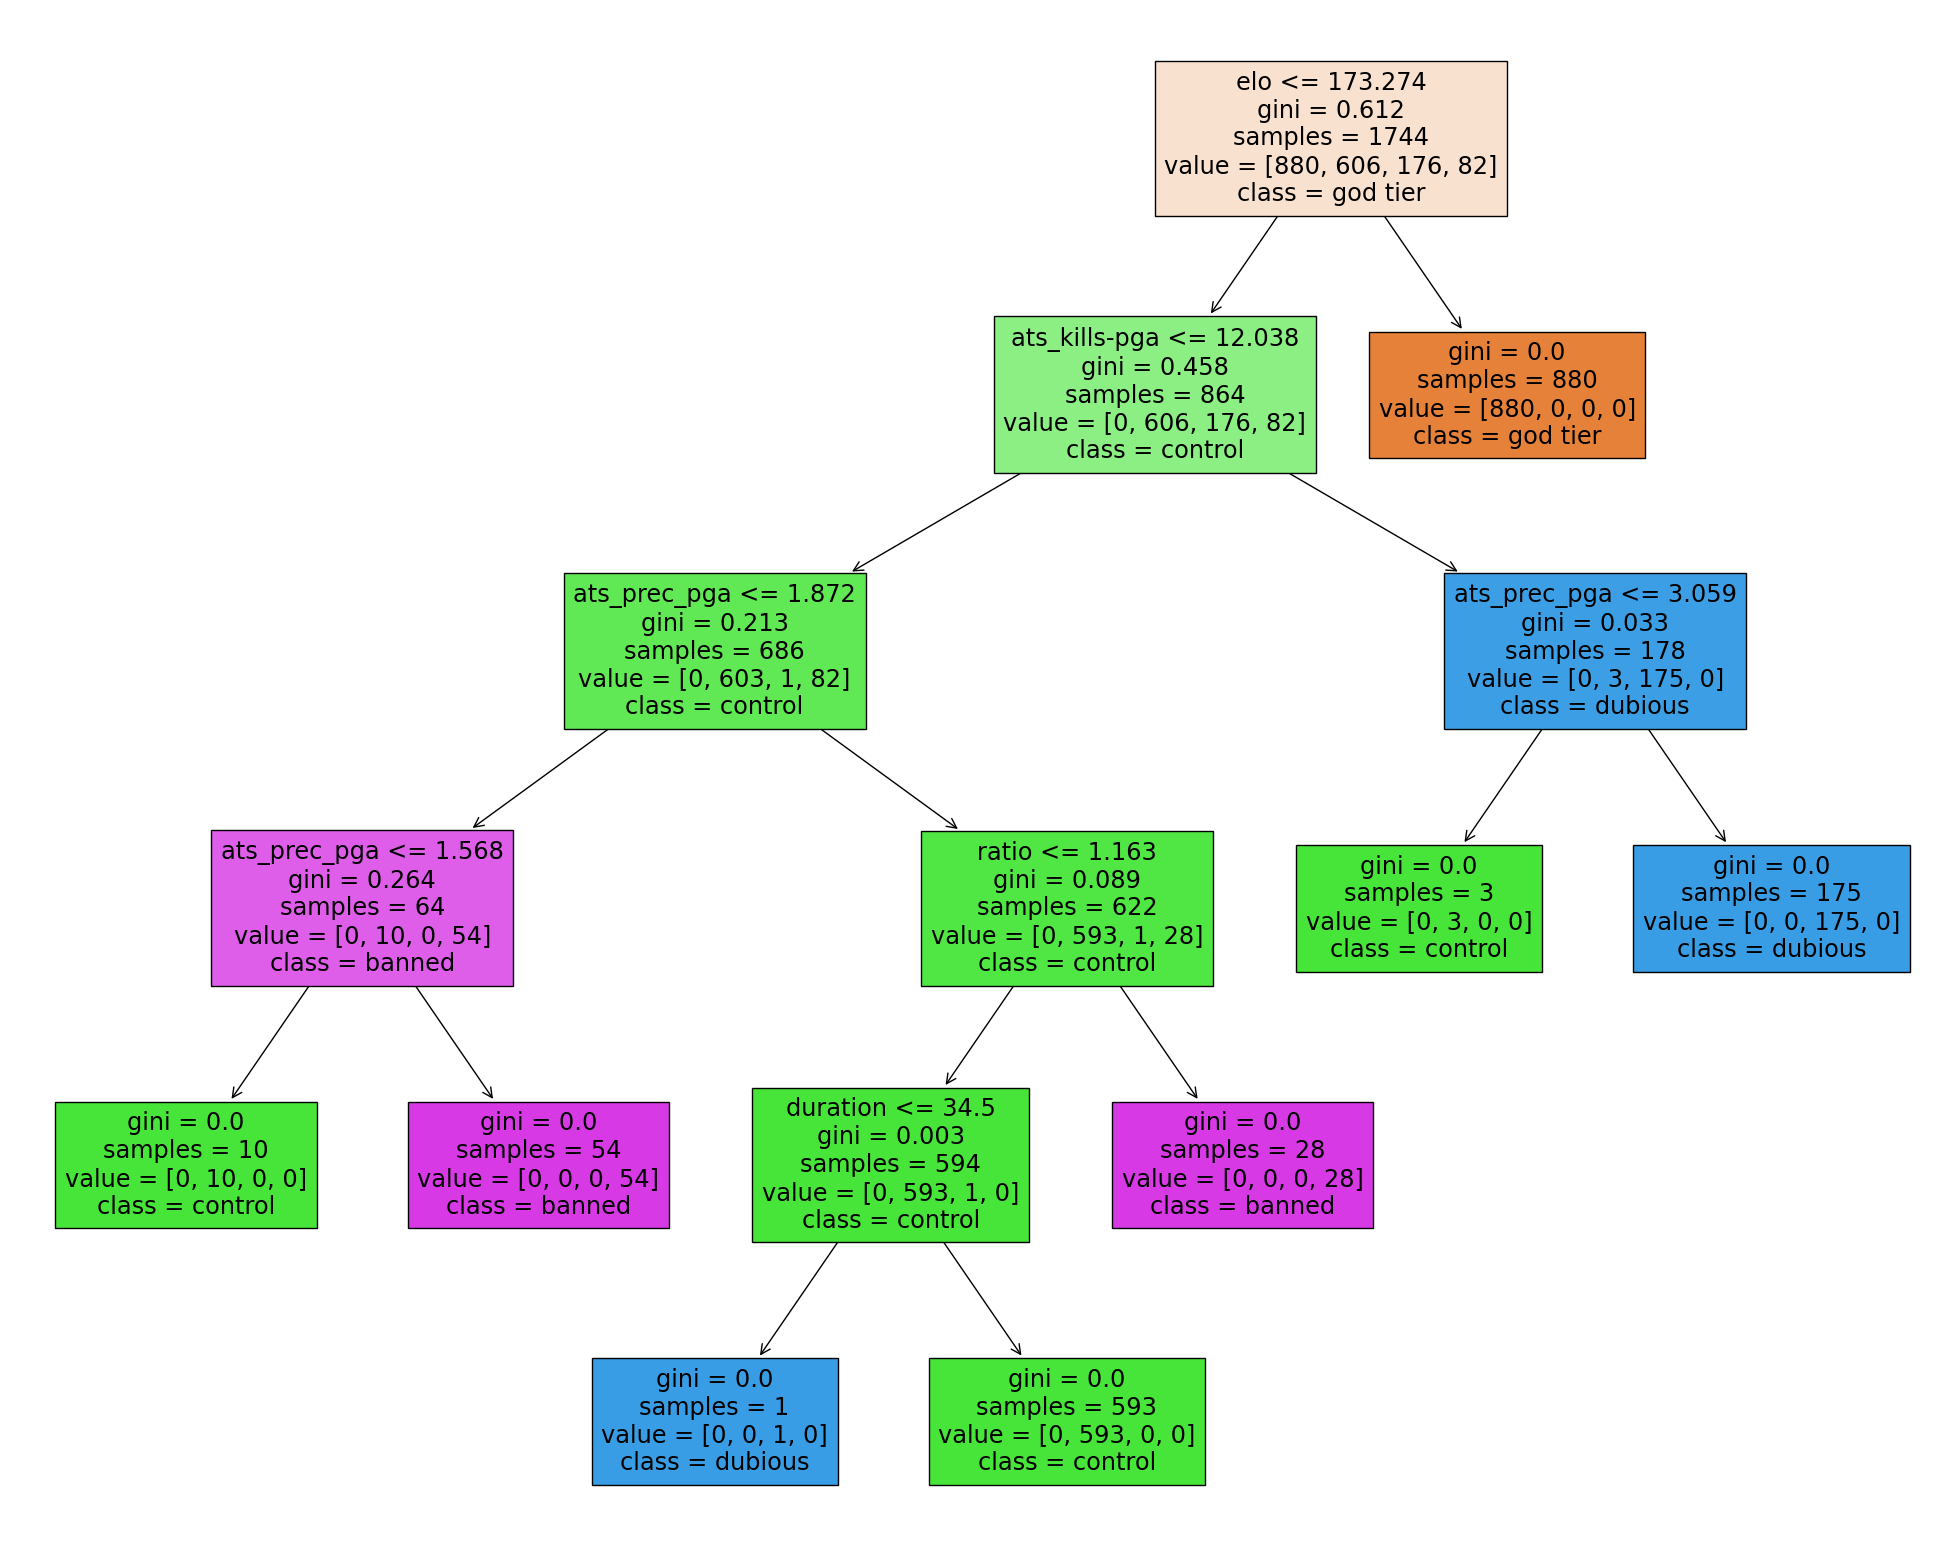

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [22]:
mymetrics(clf)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
Confusion matrix 
 [[102   0   0   0]
 [  0  67   0   0]
 [  0   0  15   0]
 [  0   0   0  10]]


In [23]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train.values, y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train.values, y_train.values)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test.values, y_test.values)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.84


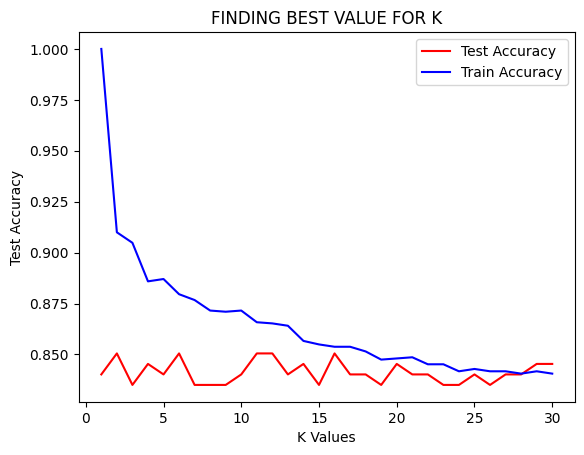

In [24]:
# Initialise a list of K values from 1 to 30
p = list(range(1, 31))

# Initialize empty lists to store accuracy scores for each K value
lst_test =[]
lst_train =[]

# Loop over each K value
for i in p:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors = i)

    # Train the classifier using the training data
    knn.fit(X_train, y_train)

    # Compute the accuracy of the classifier on the test data and store it in lst_test
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)

    # Compute the accuracy of the classifier on the training data and store it in lst_train
    lst_test.append(z)
    lst_train.append(t)

# Create a DataFrame from the lists of K values and accuracy scores
# Needed to avoid a melt to match seaborn preferred data format
# Original dataframeis wide format, seaborn prefers long format
data = pd.DataFrame({
    'K Values': p,
    'Test Accuracy': lst_test,
    'Train Accuracy': lst_train
})

# Use Seaborn to create the plot for Test Accuracy
sns.lineplot(x='K Values', y='Test Accuracy', data=data, label='Test Accuracy', color='red')

# Use Seaborn to create the plot for Train Accuracy
sns.lineplot(x='K Values', y='Train Accuracy', data=data, label='Train Accuracy', color='blue')

# Add a title to the plot
plt.title('FINDING BEST VALUE FOR K')
# Add a legend to the plot
plt.legend()

<Axes: xlabel='ats_kills-pga', ylabel='elo'>

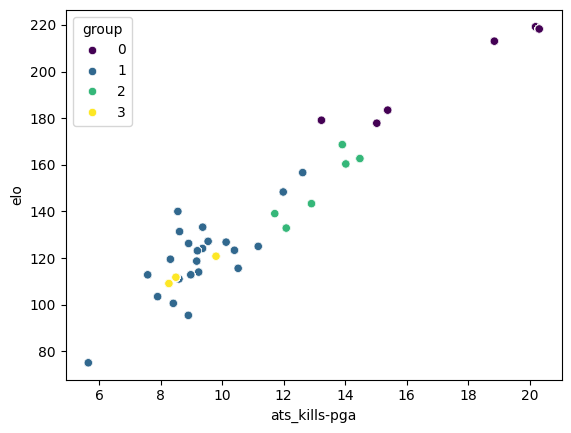

In [25]:
sns.scatterplot(data=df2, x="ats_kills-pga", y="elo", hue="group", palette='viridis')
# Classes: ['god tier', 'control', 'dubious', 'banned'] 

## Unsupervised learning

In [41]:
%pip install adspy_shared_utilities

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement adspy_shared_utilities (from versions: none)
ERROR: No matching distribution found for adspy_shared_utilities


In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

# Selecting components
#df_trim = df2[['kda','elo','opponentsDefeated', 'ats_kills-pga']]
#X = df_trim.iloc[:, :-1]
#y = df_trim.iloc[:, -1]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

feature_names = X_train.columns
X_train_normalized = MinMaxScaler().fit(X_train).transform(X_train)  

km = KMeans(n_clusters=4, n_init='auto', random_state = 0)
km.fit(X_train_normalized)

plot_labelled_scatter(X_train_normalized, km.labels_, 
                      ['g1', 'g2', 'g3', 'g4'])

ModuleNotFoundError: No module named 'adspy_shared_utilities'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_train).transform(X_train)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_train.shape, X_pca.shape)

In [ ]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'bone')

plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

In [ ]:
mymetrics(km)

In [ ]:
# List to hold the inertias
inertias = []

# Range of cluster numbers to try
K = range(1, 11)

# Calculate inertia for each number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()